In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('OneDrive/2018-2019/Courses/science_questions.csv')

In [3]:
data.head()

,questionID,AnswerKey,examName,schoolGrade,question,subject
0,AKDE&ED_2008_4_4,C,Alaska Department of Education & Early Develop...,4,Which organism needs to make its own food? (A)...,Biology
1,AKDE&ED_2008_4_31,D,Alaska Department of Education & Early Develop...,4,Students planted one hundred flower seeds. The...,Biology
2,AKDE&ED_2012_4_9,C,Alaska Department of Education & Early Develop...,4,Study the data table below. {Alaska-2012-4-10}...,Biology
3,AKDE&ED_2012_4_24,B,Alaska Department of Education & Early Develop...,4,The chart shows observations of the Moon. {Ala...,Biology
4,CSZ_2009_5_18,A,California Standards Test,5,A balloon has a negative charge. A glass rod h...,Biology


In [4]:
data.describe()

,schoolGrade
count,2707.000000
mean,5.910233
std,1.817138
min,3.000000
25%,4.000000
50%,5.000000
75%,8.000000
max,8.000000


In [5]:
import nltk
import bs4 as bs
from nltk.tokenize import sent_tokenize # tokenizes sentences
import re
from nltk.stem import PorterStemmer
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

In [6]:
n,f = data.shape

In [7]:
question = bs.BeautifulSoup(data['question'][0],features='lxml').text
question = question.replace('.','. ')
question = re.sub(r'\{.*\}', '', question)
question = re.sub('[^a-zA-Z ]' ,'',question)
question = question.lower()
question

'which organism needs to make its own food a '

In [8]:
question_words = question.split()

## Lemmatisation of the questions

In [9]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Andy\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [10]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Andy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
token_tag = pos_tag(question_words)

In [12]:
def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return 'n'

In [13]:
from nltk.stem import WordNetLemmatizer


wnl = WordNetLemmatizer()

wnl_stems = []
for pair in token_tag:
    res = wnl.lemmatize(pair[0],pos=get_wordnet_pos(pair[1]))
    wnl_stems.append(res)

print(' '.join(wnl_stems))

which organism need to make it own food a


## Removing Stopwords

In [14]:
from nltk.corpus import stopwords

eng_stopwords = stopwords.words('english')
question_wo_stopwords = [w for w in question_words if not w in stopwords.words("english")]

In [15]:
question_wo_stopwords

['organism', 'needs', 'make', 'food']

## Do it for all questions

In [17]:
import numpy as np
bag_question = []
for i in range(n):
    question = bs.BeautifulSoup(data['question'][i],features='lxml').text
    question = question.replace('.','. ')
    question = re.sub(r'\{.*\}', '', question)
    question = re.sub('[^a-zA-Z ]' ,'',question)
    question = question.lower()
    question_words = question.split()
    token_tag = pos_tag(question_words)
    wnl = WordNetLemmatizer()
    wnl_stems = []
    for pair in token_tag:
        res = wnl.lemmatize(pair[0],pos=get_wordnet_pos(pair[1]))
        wnl_stems.append(res)
    question_wo_stopwords = [w for w in question_words if not w in stopwords.words("english")]
    bag_question.append(question_wo_stopwords)

In [18]:
data['bag_question'] = bag_question

In [19]:
data.head()

,questionID,AnswerKey,examName,schoolGrade,question,subject,bag_question
0,AKDE&ED_2008_4_4,C,Alaska Department of Education & Early Develop...,4,Which organism needs to make its own food? (A)...,Biology,"[organism, needs, make, food]"
1,AKDE&ED_2008_4_31,D,Alaska Department of Education & Early Develop...,4,Students planted one hundred flower seeds. The...,Biology,"[students, planted, one, hundred, flower, seed..."
2,AKDE&ED_2012_4_9,C,Alaska Department of Education & Early Develop...,4,Study the data table below. {Alaska-2012-4-10}...,Biology,"[study, data, table, two, students, want, know..."
3,AKDE&ED_2012_4_24,B,Alaska Department of Education & Early Develop...,4,The chart shows observations of the Moon. {Ala...,Biology,"[chart, shows, observations, moon]"
4,CSZ_2009_5_18,A,California Standards Test,5,A balloon has a negative charge. A glass rod h...,Biology,"[balloon, negative, charge, glass, rod, positi..."


In [20]:
question_clean_wnl = []
wnl = WordNetLemmatizer()
for i in range(0,n):
    if( (i+1)%500 == 0 ):
        # print progress
        print("Done with %d reviews" %(i+1)) 
    
    wnl_stems = []
    question = data['bag_question'][i]
    token_tag = pos_tag(question)
    for pair in token_tag:
        res = wnl.lemmatize(pair[0],pos=get_wordnet_pos(pair[1]))
        wnl_stems.append(res)

    question_clean_wnl.append(' '.join(wnl_stems))

Done with 500 reviews
Done with 1000 reviews
Done with 1500 reviews
Done with 2000 reviews
Done with 2500 reviews


In [21]:
question_clean_wnl[3]

'chart show observation moon'

In [22]:
data['cleaned_question'] = question_clean_wnl

In [23]:
data.head()

,questionID,AnswerKey,examName,schoolGrade,question,subject,bag_question,cleaned_question
0,AKDE&ED_2008_4_4,C,Alaska Department of Education & Early Develop...,4,Which organism needs to make its own food? (A)...,Biology,"[organism, needs, make, food]",organism need make food
1,AKDE&ED_2008_4_31,D,Alaska Department of Education & Early Develop...,4,Students planted one hundred flower seeds. The...,Biology,"[students, planted, one, hundred, flower, seed...",student plant one hundred flower seed observe ...
2,AKDE&ED_2012_4_9,C,Alaska Department of Education & Early Develop...,4,Study the data table below. {Alaska-2012-4-10}...,Biology,"[study, data, table, two, students, want, know...",study data table two student want know tempera...
3,AKDE&ED_2012_4_24,B,Alaska Department of Education & Early Develop...,4,The chart shows observations of the Moon. {Ala...,Biology,"[chart, shows, observations, moon]",chart show observation moon
4,CSZ_2009_5_18,A,California Standards Test,5,A balloon has a negative charge. A glass rod h...,Biology,"[balloon, negative, charge, glass, rod, positi...",balloon negative charge glass rod positive cha...


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
question = data['cleaned_question']
vect = CountVectorizer()
vect.fit(question)
bag = vect.transform(question)
vect_df = pd.DataFrame(bag.toarray(), columns=vect.get_feature_names())
vect_df.head()

,aa,abandon,abandoned,abdomen,ability,able,abnormal,abnormality,abraham,absorb,...,zealand,zero,zesty,zinc,zn,zncl,zone,zooplankton,zorite,zygote
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
q, w = vect_df.shape

In [26]:
vect_question = bag.toarray()
vect_question

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [27]:
from sklearn.cluster import KMeans
import numpy as np

In [28]:
k = 5 # number of clusters
kmeans = KMeans(n_clusters=k, init='random')
kmeans.fit(vect_question)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [30]:
vect_question.shape

(2707, 4767)

In [35]:
#
# Get a list of the questions in each cluster
#
clusters = []
for j in range(0,k):
    clusters.append([])
for i in range(0,2707):
    clusters[kmeans.labels_[i]].append(i)
#
# Print out clusters
#
for j in range(0,k):
    print(j+1,'\n', clusters[j], '\n\n')

1 
 [2087, 2218, 2640] 


2 
 [11, 37, 92, 129, 135, 136, 137, 141, 146, 149, 152, 153, 155, 156, 201, 213, 224, 226, 239, 246, 249, 275, 276, 277, 357, 448, 459, 483, 484, 487, 545, 546, 554, 565, 578, 592, 643, 760, 778, 791, 889, 922, 926, 945, 946, 950, 956, 963, 967, 996, 1052, 1221, 1324, 1339, 1346, 1360, 1387, 1391, 1418, 1440, 1518, 1620, 1703, 1729, 1730, 1739, 1909, 1935, 1936, 1941, 1956, 1977, 2059, 2110, 2123, 2167, 2181, 2197, 2208, 2248, 2372, 2407, 2412, 2424, 2457, 2460, 2639] 


3 
 [18, 40, 41, 50, 71, 114, 169, 176, 206, 214, 218, 264, 266, 270, 271, 272, 289, 295, 319, 334, 407, 417, 452, 458, 466, 469, 513, 514, 517, 523, 636, 756, 768, 844, 870, 893, 941, 951, 954, 960, 968, 1002, 1005, 1010, 1024, 1025, 1060, 1093, 1116, 1207, 1287, 1386, 1494, 1516, 1519, 1523, 1585, 1665, 1669, 1732, 1733, 1734, 1744, 1745, 1746, 1880, 2003, 2231, 2406, 2493, 2512, 2525, 2529, 2581, 2649, 2651, 2706] 


4 
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 19, 20, 21

We can visualize the four different clusters. The fourth is much bigger than the other. Let's try with k=10.

In [36]:
k = 10 # number of clusters
kmeans = KMeans(n_clusters=k, init='random')
kmeans.fit(vect_question)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [37]:
#
# Get a list of the questions in each cluster
#
clusters = []
for j in range(0,k):
    clusters.append([])
for i in range(0,2707):
    clusters[kmeans.labels_[i]].append(i)
#
# Print out clusters
#
for j in range(0,k):
    print(j+1,'\n', clusters[j], '\n\n')

1 
 [18, 513, 514] 


2 
 [383, 932, 933, 1637, 1645, 1867, 2151, 2232, 2329, 2613, 2623] 


3 
 [63, 64, 505, 616, 668, 669, 775, 1457, 1706, 1975, 1996, 2192, 2210, 2275, 2278, 2284, 2298, 2495, 2500, 2520, 2571, 2577, 2601, 2617] 


4 
 [11, 37, 66, 67, 92, 129, 135, 136, 137, 141, 146, 148, 149, 152, 153, 201, 213, 224, 226, 239, 246, 249, 275, 276, 277, 357, 365, 401, 448, 459, 483, 484, 487, 492, 545, 546, 554, 564, 565, 578, 592, 643, 686, 687, 725, 746, 777, 778, 791, 889, 922, 926, 943, 950, 956, 967, 996, 1049, 1052, 1221, 1322, 1324, 1339, 1346, 1360, 1382, 1387, 1391, 1418, 1440, 1443, 1518, 1532, 1568, 1612, 1620, 1703, 1729, 1730, 1756, 1851, 1891, 1909, 1935, 1936, 1941, 1942, 1955, 1956, 1977, 2008, 2059, 2110, 2118, 2123, 2167, 2181, 2197, 2208, 2248, 2368, 2372, 2404, 2407, 2412, 2424, 2457, 2460, 2639] 


5 
 [155, 156, 760, 945, 946] 


6 
 [125, 126, 127, 131, 167, 192, 193, 194, 237, 288, 426, 445, 470, 501, 761, 770, 999, 1000, 1014, 1054, 1157, 1161, 1167, 1319,

We still have a big cluster, the 9th.

We can try hierarchical clustering.

In [42]:
import scipy.cluster.hierarchy as sch
names = [i for i in range(2707)]
#
# Adjust figure size to accommodate the full tree
#
from pylab import rcParams
#
# Do hierarchical clustering using Ward's method
#
z = sch.linkage(vect_question, method='ward')

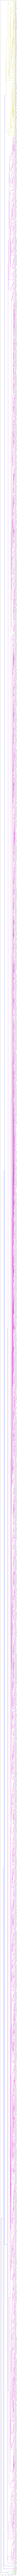

In [44]:
#
# Display dendrogram
#
rcParams['figure.figsize'] = 5, 900
info = sch.dendrogram(z, orientation='left', labels=names, leaf_font_size=11)

Here, to have a useful clustering, we should stop at the third/fourth layer.